In [199]:
#most positive, most negative, largest range, biggest reversal

# Load necessary libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
# File path to the Excel file
file_path = "data.xlsx"  # Replace with your actual file path

# Load the Excel file into a dictionary of DataFrames
try:
    # Read all sheets into a dictionary of DataFrames
    excel_data = pd.read_excel(os.path.join(os.getcwd(), "data", file_path), sheet_name=None)
    print("Excel file successfully loaded!")
    
    # Access specific sheets by name
    df_oct = excel_data.get("oct", pd.DataFrame())
    df_jan = excel_data.get("jan", pd.DataFrame())
    df_jan_summary = excel_data.get("jan_summary", pd.DataFrame())
    df_oct_summary = excel_data.get("oct_summary", pd.DataFrame())

except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

# Combine the two DataFrames
df_combined = pd.concat([df_jan_summary, df_oct_summary], ignore_index=True)

# Create a DataFrame for rows with NaN values
exemption_list = df_combined[df_combined.isnull().any(axis=1)]

# Drop rows with NaN values from the combined DataFrame
df_combined = df_combined.dropna()

Excel file successfully loaded!


In [201]:
exemption_list

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,Two_Day_Reversal_Return_Avg,Ticker
0,27,0,NaN,NaN,NaN,3.63,5.640000,5.6300,3.290000,4.6900,NaN,AMD
1,29,0,NaN,NaN,NaN,-3.80,-2.570000,-0.2700,4.000000,6.0600,NaN,AMD
2,32,0,NaN,NaN,NaN,-1.23,-0.146667,1.9400,4.093333,5.3800,NaN,AMD
3,35,0,NaN,NaN,NaN,2.91,5.520000,6.3100,4.560000,4.4200,NaN,AMD
4,36,0,NaN,NaN,NaN,2.67,5.440000,6.0100,4.880000,4.5600,NaN,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...
1648,101,0,4.3600,4.36,4.36,0.05,3.870000,4.6900,4.560000,3.4800,NaN,ORCL
1649,102,0,5.1250,5.35,4.90,0.50,2.122500,4.2825,4.350000,4.4425,NaN,ORCL
1650,103,0,4.9725,5.55,4.29,0.38,2.492500,4.6275,4.605000,4.0950,NaN,ORCL
1651,105,0,5.3900,5.39,5.39,0.60,1.480000,4.9000,4.910000,4.2600,NaN,ORCL


In [202]:
df_combined

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,Two_Day_Reversal_Return_Avg,Ticker
13,45,1,-5.150000,-5.15,-5.15,-0.799091,1.020909,2.888182,4.854545,6.222727,-0.360,AMD
14,46,1,1.780000,8.46,-4.90,0.423750,1.887500,3.858750,6.262500,7.085000,-0.320,AMD
15,47,2,7.423333,8.39,5.51,3.408333,5.505000,5.818333,7.820000,9.175000,0.835,AMD
17,49,1,8.175000,14.02,1.40,1.923043,3.685652,5.322727,7.403182,8.392727,-3.850,AMD
18,50,3,7.690000,10.83,1.81,1.322857,2.654286,4.132308,6.865385,8.374615,-2.270,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,91,2,4.358500,6.17,0.98,0.860000,1.760000,3.892222,4.470000,4.823889,1.255,ORCL
1640,93,1,4.819412,5.82,1.19,0.384706,2.291176,4.607647,4.800000,4.226471,2.070,ORCL
1641,94,2,4.163750,5.57,1.16,1.370000,2.764000,4.353333,4.876667,4.698667,0.985,ORCL
1643,96,1,4.475294,5.66,3.40,1.373529,3.077059,4.392941,4.950588,4.664118,0.420,ORCL


In [203]:
# Assuming 'df' is your DataFrame
columns_to_average = [
    "Reversal_Frequency",
    "Average_Return",
    "Max_Positive_Return",
    "Max_Negative_Return",
    "Forward_1D_Return_Avg",
    "Forward_2D_Return_Avg",
    "Forward_3D_Return_Avg",
    "Forward_4D_Return_Avg",
    "Forward_5D_Return_Avg",
    "Two_Day_Reversal_Return_Avg"
]

# Group by 'anonymous signal' and calculate the mean for the specified columns
df_combined_avg = (
    df_combined.groupby("anonymous signal", as_index=False)[columns_to_average].mean()
)

# Optionally handle the 'Ticker' column, for example by concatenating unique tickers for each signal
df_combined_avg["Ticker"] = (
    df_combined.groupby("anonymous signal")["Ticker"]
    .apply(lambda x: ', '.join(x.unique()))  # Concatenate unique tickers
    .reset_index(drop=True)
)


In [204]:
df_combined_avg

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,Two_Day_Reversal_Return_Avg,Ticker
0,8,2.000000,2.315000,2.500000,2.130000,3.355000,7.765000,11.515000,10.600000,16.155000,-0.395000,AVGO
1,10,1.000000,-3.696667,-3.696667,-3.696667,0.926667,4.290000,5.176667,5.140000,6.783333,0.463333,"AVGO, MRNA"
2,12,2.333333,-5.270556,-3.296667,-7.400000,0.277778,2.676111,4.296667,4.076667,6.242778,0.488889,"AVGO, MRNA"
3,13,1.000000,-0.440000,-0.440000,-0.440000,2.360000,1.710000,3.060000,3.340000,3.000000,0.750000,MRNA
4,14,4.000000,-2.160000,-0.320000,-5.870000,1.720000,1.402500,2.667500,2.080000,2.240000,1.462500,MRNA
...,...,...,...,...,...,...,...,...,...,...,...,...
127,138,1.000000,15.150000,15.150000,15.150000,-3.420000,11.710000,7.750000,3.410000,3.100000,1.990000,MSTR
128,139,1.000000,12.580000,23.130000,2.030000,-2.940000,-1.840000,1.820000,-1.220000,2.030000,-5.650000,MSTR
129,140,2.000000,-3.115000,0.200000,-6.430000,0.935000,0.720000,2.215000,2.050000,2.335000,0.355000,MRNA
130,144,1.000000,6.900000,6.900000,6.900000,3.940000,6.700000,9.030000,11.910000,15.380000,-3.550000,MSTR


In [205]:
df_combined_avg.nlargest(5, "Forward_1D_Return_Avg")

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,Two_Day_Reversal_Return_Avg,Ticker
131,145,1.0,5.830000,5.830000,5.830000,6.440000,8.580000,9.510000,9.030000,12.390000,1.540000,MSTR
27,38,24.5,-0.863437,5.622500,-8.466667,5.455053,6.704680,7.559751,9.451752,9.244750,-1.673447,"AVGO, MRNA, MSTR, TSLA, SMCI, ORCL, AMD"
19,30,8.5,-2.918493,0.738333,-7.965000,5.411324,5.657251,8.155641,11.290540,11.052096,-2.572136,"AVGO, MRNA, TSLA, SMCI, ORCL, AMD, MSTR"
130,144,1.0,6.900000,6.900000,6.900000,3.940000,6.700000,9.030000,11.910000,15.380000,-3.550000,MSTR
0,8,2.0,2.315000,2.500000,2.130000,3.355000,7.765000,11.515000,10.600000,16.155000,-0.395000,AVGO


In [206]:
df_combined_avg.nlargest(5, "Two_Day_Reversal_Return_Avg")

,anonymous signal,Reversal_Frequency,Average_Return,Max_Positive_Return,Max_Negative_Return,Forward_1D_Return_Avg,Forward_2D_Return_Avg,Forward_3D_Return_Avg,Forward_4D_Return_Avg,Forward_5D_Return_Avg,Two_Day_Reversal_Return_Avg,Ticker
127,138,1.000,15.150000,15.15000,15.15000,-3.420000,11.710000,7.750000,3.410000,3.100000,1.990000,MSTR
131,145,1.000,5.830000,5.83000,5.83000,6.440000,8.580000,9.510000,9.030000,12.390000,1.540000,MSTR
117,128,7.125,8.107113,18.63375,1.29875,1.801455,2.637894,4.327151,5.124574,4.807955,1.508735,"MRNA, ROKU, SMCI, AVGO, MSTR"
4,14,4.000,-2.160000,-0.32000,-5.87000,1.720000,1.402500,2.667500,2.080000,2.240000,1.462500,MRNA
116,127,8.375,7.701163,19.07250,-0.04500,1.062939,2.111659,3.567334,4.962813,5.272169,0.926305,"MRNA, ROKU, SMCI, AVGO, MSTR"


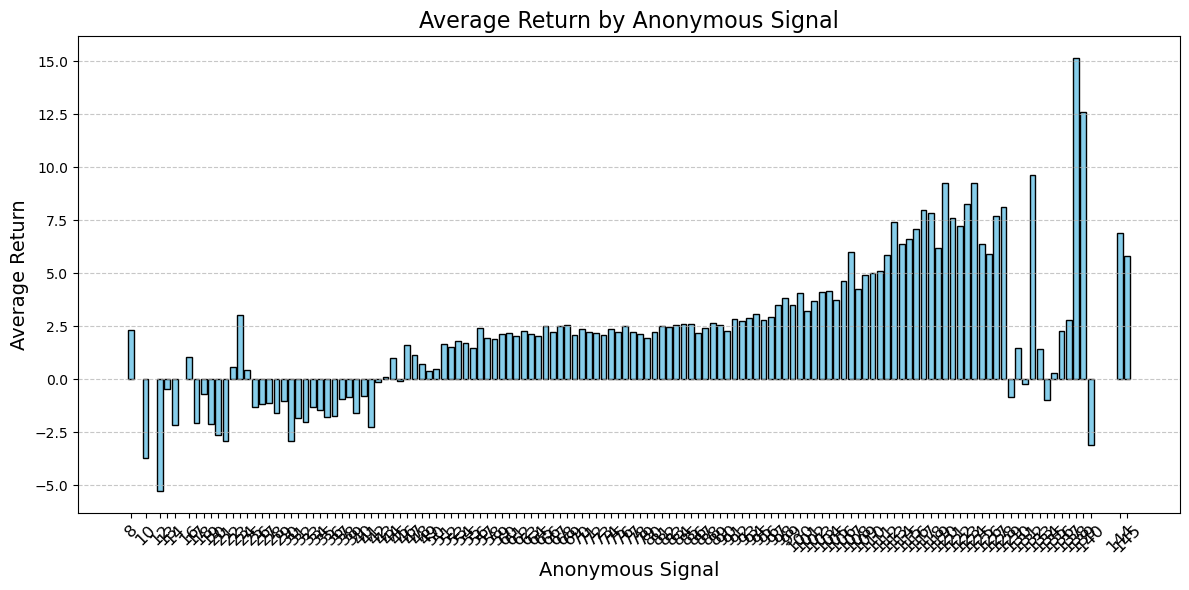

In [207]:
# Plot the Average_Return for each anonymous signal
plt.figure(figsize=(12, 6))
plt.bar(df_combined_avg["anonymous signal"], df_combined_avg["Average_Return"], color="skyblue", edgecolor="black")
plt.title("Average Return by Anonymous Signal", fontsize=16)
plt.xlabel("Anonymous Signal", fontsize=14)
plt.ylabel("Average Return", fontsize=14)
plt.xticks(df_combined_avg["anonymous signal"], rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

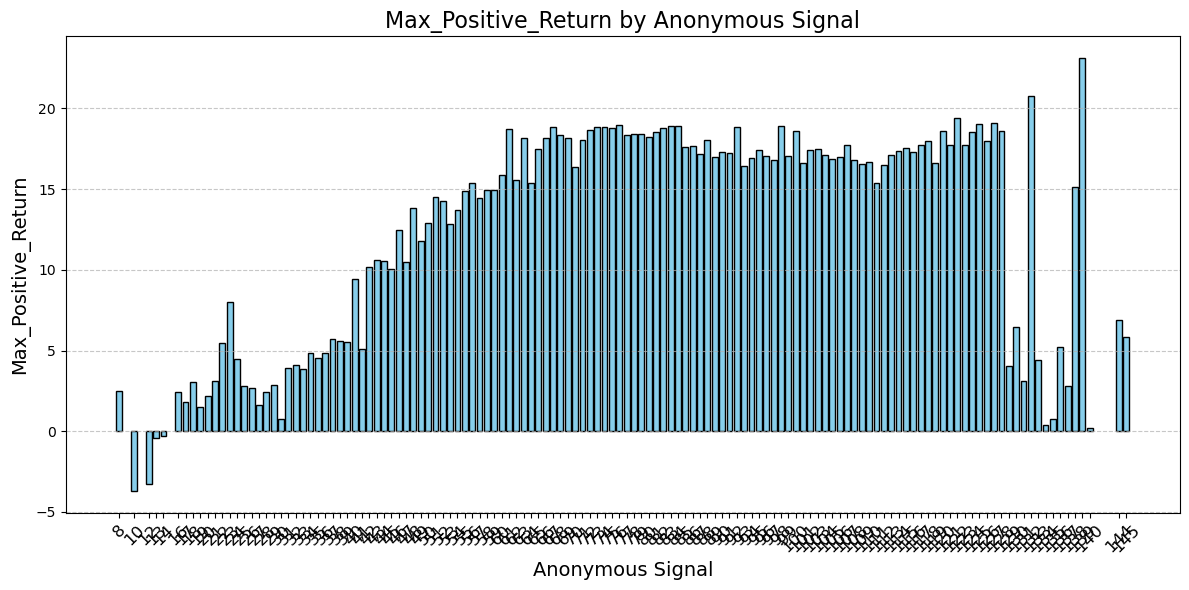

In [208]:
# Plot the Max_Positive_Return for each anonymous signal
plt.figure(figsize=(12, 6))
plt.bar(df_combined_avg["anonymous signal"], df_combined_avg["Max_Positive_Return"], color="skyblue", edgecolor="black")
plt.title("Max_Positive_Return by Anonymous Signal", fontsize=16)
plt.xlabel("Anonymous Signal", fontsize=14)
plt.ylabel("Max_Positive_Return", fontsize=14)
plt.xticks(df_combined_avg["anonymous signal"], rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

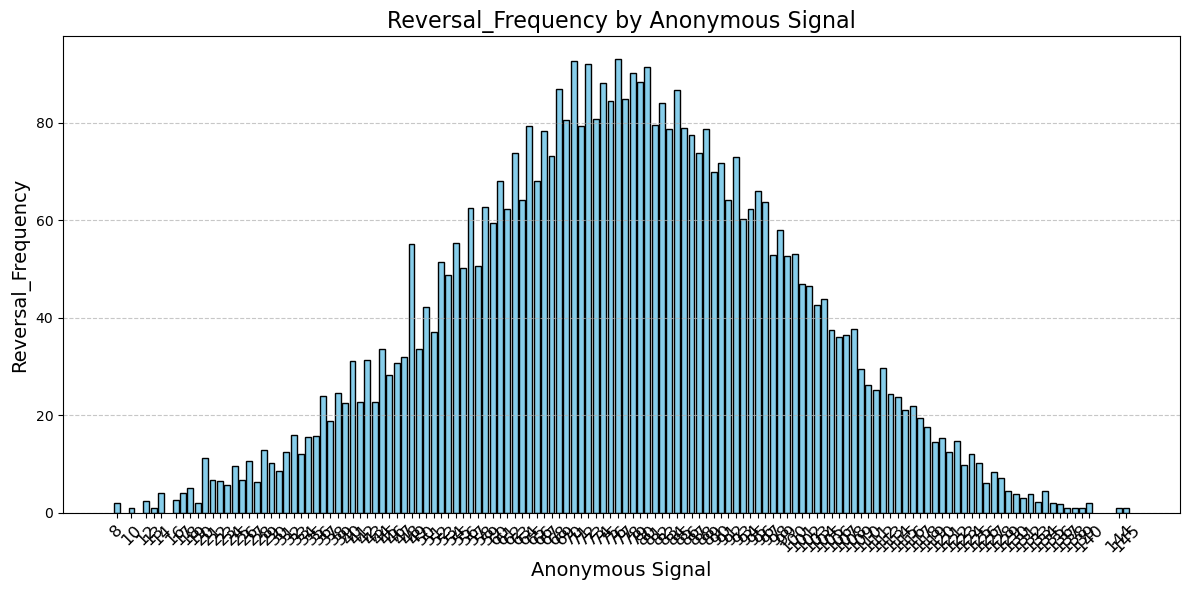

In [209]:
# Plot the Reversal_Frequency for each anonymous signal
plt.figure(figsize=(12, 6))
plt.bar(df_combined_avg["anonymous signal"], df_combined_avg["Reversal_Frequency"], color="skyblue", edgecolor="black")
plt.title("Reversal_Frequency by Anonymous Signal", fontsize=16)
plt.xlabel("Anonymous Signal", fontsize=14)
plt.ylabel("Reversal_Frequency", fontsize=14)
plt.xticks(df_combined_avg["anonymous signal"], rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()